In [176]:
!pip install PyGithub

In [177]:
import pandas as pd
import numpy as np
import csv
from tqdm import tqdm
import base64
from io import BytesIO
import requests
import io
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,RegexpTokenizer
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [178]:
# Username of your GitHub account
 
username = ''
 
# Personal Access Token (PAO) from your GitHub account
 
token = ''
 
# Creates a re-usable session object with your creds in-built
 
github_session = requests.Session()
github_session.auth = (username, token)

In [210]:
def download_data(url):

    url = url # Make sure the url is the raw version of the file on GitHub
    download = github_session.get(url).content

    df= pd.read_csv(io.StringIO(download.decode('utf-8')))
    
    return df

In [221]:
url = 'https://raw.githubusercontent.com/OmdenaAI/WeoWater/main/task-3-wrangling-preprocessing/Scraped Twitter Data/preprocessed_extracted_tweets_1000.csv'
twitter_df= download_data(url)

In [222]:
twitter_df.head(30)

,Unnamed: 0,Unnamed: 0.1,language,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,urls,photos,hashtags,link,retweet,quote_url,video,Cleaned Tweets,Cleaned Tweets Further,Location Name,category
0,0,0,en,1.392400e+18,1.392400e+18,2021-05-12 14:01:43 India Standard Time,12-05-2021,14:01:43,530,8.929951e+08,ifrcafrica,IFRC Africa,NaN,"Across Africa, at any given time, Red Cross an...",['http://bit.ly/2RNeRSU'],['https://pbs.twimg.com/media/E1LJvvxWEAIRV86....,['floods'],https://twitter.com/IFRCAfrica/status/13923970...,False,NaN,1,"across africa, at any given time, red cross an...",across africa at any given time red cross an...,[],flood
1,1,1,en,1.392400e+18,1.392400e+18,2021-05-12 13:55:41 India Standard Time,12-05-2021,13:55:41,530,9.085950e+17,wanjohikinguru,Wanjohi King'uru,NaN,Poor drainage in Transami means we have to end...,[],[],"['nairobi', 'floods']",https://twitter.com/WanjohiKinguru/status/1392...,False,NaN,1,poor drainage in transami means we have to end...,poor drainage in transami means we have to end...,[],flood
2,2,2,en,1.392390e+18,1.392390e+18,2021-05-12 13:35:46 India Standard Time,12-05-2021,13:35:46,530,1.604304e+07,ncedigital,New Civil Engineer,NaN,Daily brief: 🌥️ Queen's Speech intensifies #H...,"['https://buff.ly/3eDdK1i', 'https://buff.ly/3...",['https://pbs.twimg.com/media/E1LDz05XIAAptuR....,"['hs2', 'engineering', 'civilengineering', 'ra...",https://twitter.com/ncedigital/status/13923905...,False,NaN,1,daily brief: 🌥️ queen's speech intensifies hs2...,daily brief queen s speech intensifies hs2...,[],none
3,3,3,en,1.392390e+18,1.392390e+18,2021-05-12 13:34:05 India Standard Time,12-05-2021,13:34:05,530,2.985111e+09,malurussally,Sally Forsstrom,NaN,#climate change impacts here already with #dro...,[],[],"['climate', 'drought', 'bushfires', 'floods', ...",https://twitter.com/MalurusSally/status/139239...,False,https://twitter.com/shoebridgemlc/status/13922...,0,climate change impacts here already with droug...,climate change impacts here already with droug...,[],flood_drought
4,4,4,en,1.392390e+18,1.392390e+18,2021-05-12 13:29:27 India Standard Time,12-05-2021,13:29:27,530,8.565930e+17,infonile,InfoNile,NaN,"🧵: This is Thirst in a River Basin, an interac...",['https://maps.infonile.org/covid-water-scarci...,['https://pbs.twimg.com/media/E1LCXHmXoAM1J_9....,"['infomap', 'rainfall', 'droughts', 'floods', ...",https://twitter.com/infoNILE/status/1392388939...,False,NaN,1,"🧵: this is thirst in a river basin, an interac...",this is thirst in a river basin an interac...,[],flood_drought
5,5,5,en,1.392360e+18,1.392360e+18,2021-05-12 11:27:07 India Standard Time,12-05-2021,11:27:07,530,1.309110e+18,antoinewalter7,(don't) Waste Water,NaN,"What if we could avoid Fatbergs, #Sewer Blocka...",['https://dww.show'],['https://pbs.twimg.com/media/E1KmXPYWQAMD_EN....,"['sewer', 'floods', 'podcast']",https://twitter.com/AntoineWalter7/status/1392...,False,NaN,1,"what if we could avoid fatbergs, sewer blockag...",what if we could avoid fatbergs sewer blockag...,[],flood
6,6,6,en,1.392360e+18,1.392360e+18,2021-05-12 11:22:00 India Standard Time,12-05-2021,11:22:00,530,1.107370e+18,xy5z89,Xy5Z89🇩🇪🇪🇺,NaN,#UPDATE 🇺🇳#UN #Somalia #Geneva #FLOODS Map by ...,[],['https://pbs.twimg.com/media/E1KlMVhXIAAGc15....,"['update', 'un', 'somalia', 'geneva', 'floods']",https://twitter.com/Xy5Z89/status/139235686902...,False,https://twitter.com/Xy5Z89/status/139109590676...,1,update 🇺🇳un somalia geneva floods map by on tu...,update un somalia geneva floods map by on tu...,[],flood
7,7,7,en,1.392350e+18,1.392350e+18,2021-05-12 10:57:37 India Standard Time,12-05-2021,10:57:37,530,2.190384e+08,darleneosicotte,Darlene O-Sicotte,NaN,@redcrosscanada help !!! @amnesty @HRWatchdog ...,[],[],"['fortsimpson', 'floods']",https://twitter.com/DarleneOSicotte/status/139...,False,https://twitter.com/mlala_ms/status/1391972141...,0,help !!! fortsimpson floods,help fortsimpson floods,[],flood
8,8,8,en,1.392330e+18,1.392330e+

In [223]:
twitter_df.shape

(1000, 25)

In [224]:
twitter_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'language', 'id', 'conversation_id',
       'created_at', 'date', 'time', 'timezone', 'user_id', 'username', 'name',
       'place', 'tweet', 'urls', 'photos', 'hashtags', 'link', 'retweet',
       'quote_url', 'video', 'Cleaned Tweets', 'Cleaned Tweets Further',
       'Location Name', 'category'],
      dtype='object')

In [225]:
#Removing unwanted columns
twitter_df= twitter_df.drop(['Unnamed: 0', 'Unnamed: 0.1','place','id','conversation_id','created_at', 'timezone', 'username', 'name','retweet','quote_url', 'video','Cleaned Tweets'],axis=1)

In [226]:
twitter_df.head(5)

,language,date,time,user_id,tweet,urls,photos,hashtags,link,Cleaned Tweets Further,Location Name,category
0,en,12-05-2021,14:01:43,8.929951e+08,"Across Africa, at any given time, Red Cross an...",['http://bit.ly/2RNeRSU'],['https://pbs.twimg.com/media/E1LJvvxWEAIRV86....,['floods'],https://twitter.com/IFRCAfrica/status/13923970...,across africa at any given time red cross an...,[],flood
1,en,12-05-2021,13:55:41,9.085950e+17,Poor drainage in Transami means we have to end...,[],[],"['nairobi', 'floods']",https://twitter.com/WanjohiKinguru/status/1392...,poor drainage in transami means we have to end...,[],flood
2,en,12-05-2021,13:35:46,1.604304e+07,Daily brief: 🌥️ Queen's Speech intensifies #H...,"['https://buff.ly/3eDdK1i', 'https://buff.ly/3...",['https://pbs.twimg.com/media/E1LDz05XIAAptuR....,"['hs2', 'engineering', 'civilengineering', 'ra...",https://twitter.com/ncedigital/status/13923905...,daily brief queen s speech intensifies hs2...,[],none
3,en,12-05-2021,13:34:05,2.985111e+09,#climate change impacts here already with #dro...,[],[],"['climate', 'drought', 'bushfires', 'floods', ...",https://twitter.com/MalurusSally/status/139239...,climate change impacts here already with droug...,[],flood_drought
4,en,12-05-2021,13:29:27,8.565930e+17,"🧵: This is Thirst in a River Basin, an interac...",['https://maps.infonile.org/covid-water-scarci...,['https://pbs.twimg.com/media/E1LCXHmXoAM1J_9....,"['infomap', 'rainfall', 'droughts', 'floods', ...",https://twitter.com/infoNILE/status/1392388939...,this is thirst in a river basin an interac...,[],flood_drought


In [227]:
#rename the column names
twitter_df.rename(columns={'user_id':'Id','link':'source URL','Location Name':'country','hashtags':'keywords','Cleaned Tweets Further':'cleaned body'},inplace=True)

In [228]:
#merge tweet and photos column and drop tweet and photos link seperate column
twitter_df['body']= twitter_df['tweet']+twitter_df['photos']
twitter_df= twitter_df.drop(['tweet','photos'],axis=1)

In [229]:
#merge data and time column 
twitter_df['time']= twitter_df['date']+' '+twitter_df['time']
twitter_df= twitter_df.drop(['date'],axis=1)

In [230]:
#added data source column
twitter_df['data source']= 'Twitter'

In [231]:
twitter_df['time']= pd.to_datetime(twitter_df['time'], errors='coerce',utc=True)
twitter_df['Id']= twitter_df['Id'].astype(object)

In [232]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   language      1000 non-null   object             
 1   time          1000 non-null   datetime64[ns, UTC]
 2   Id            1000 non-null   object             
 3   urls          1000 non-null   object             
 4   keywords      1000 non-null   object             
 5   source URL    1000 non-null   object             
 6   cleaned body  1000 non-null   object             
 7   country       1000 non-null   object             
 8   category      999 non-null    object             
 9   body          1000 non-null   object             
 10  data source   1000 non-null   object             
dtypes: datetime64[ns, UTC](1), object(10)
memory usage: 86.1+ KB


In [233]:
twitter_df.dropna(inplace=True)

In [234]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   language      999 non-null    object             
 1   time          999 non-null    datetime64[ns, UTC]
 2   Id            999 non-null    object             
 3   urls          999 non-null    object             
 4   keywords      999 non-null    object             
 5   source URL    999 non-null    object             
 6   cleaned body  999 non-null    object             
 7   country       999 non-null    object             
 8   category      999 non-null    object             
 9   body          999 non-null    object             
 10  data source   999 non-null    object             
dtypes: datetime64[ns, UTC](1), object(10)
memory usage: 93.7+ KB


In [235]:
twitter_df.shape

(999, 11)

In [236]:
twitter_df['title']=''

In [237]:
twitter_df= twitter_df[['Id','title','time','keywords','data source','category','country','source URL','body','cleaned body','language']]

In [238]:
twitter_df.head(5)

,Id,title,time,keywords,data source,category,country,source URL,body,cleaned body,language
0,8.92995e+08,,2021-12-05 14:01:43+00:00,['floods'],Twitter,flood,[],https://twitter.com/IFRCAfrica/status/13923970...,"Across Africa, at any given time, Red Cross an...",across africa at any given time red cross an...,en
1,9.08595e+17,,2021-12-05 13:55:41+00:00,"['nairobi', 'floods']",Twitter,flood,[],https://twitter.com/WanjohiKinguru/status/1392...,Poor drainage in Transami means we have to end...,poor drainage in transami means we have to end...,en
2,1.6043e+07,,2021-12-05 13:35:46+00:00,"['hs2', 'engineering', 'civilengineering', 'ra...",Twitter,none,[],https://twitter.com/ncedigital/status/13923905...,Daily brief: 🌥️ Queen's Speech intensifies #H...,daily brief queen s speech intensifies hs2...,en
3,2.98511e+09,,2021-12-05 13:34:05+00:00,"['climate', 'drought', 'bushfires', 'floods', ...",Twitter,flood_drought,[],https://twitter.com/MalurusSally/status/139239...,#climate change impacts here already with #dro...,climate change impacts here already with droug...,en
4,8.56593e+17,,2021-12-05 13:29:27+00:00,"['infomap', 'rainfall', 'droughts', 'floods', ...",Twitter,flood_drought,[],https://twitter.com/infoNILE/status/1392388939...,"🧵: This is Thirst in a River Basin, an interac...",this is thirst in a river basin an interac...,en


In [239]:
twitter_df['category'].value_counts()

flood                532
none                 438
flood_drought         22
flood_and_drought      5
drought                2
Name: category, dtype: int64

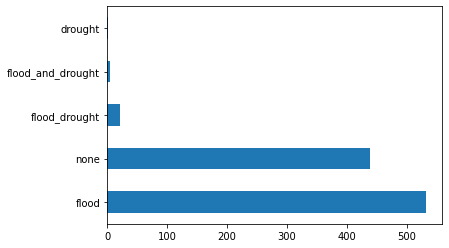

In [240]:
twitter_df['category'].value_counts().plot(kind='barh')

In [241]:
twitter_df.to_csv('extracted_tweets_transformed.csv', index=False)